In [2]:
import random
import mph
import numpy as np
import matplotlib.pyplot as plt
import os    
import time
from tqdm.notebook import tqdm
import pickle
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf

path = 'D:/Josh/Fall 2021/ML-LWA/binary_likegrey.mph'

# scattering = [1,2,5,48,51,52]

In [34]:
possible = np.append(np.array(17),np.arange(19,54))
grids_of_interest = random.sample(list(possible),18)

In [36]:
grids_of_interest

[28, 34, 24, 49, 40, 20, 44, 31, 50, 27, 51, 35, 36, 53, 19, 23, 37, 17]

In [39]:
not_of_interest = [x for x in possible if x not in grids_of_interest]

In [40]:
not_of_interest

[21, 22, 25, 26, 29, 30, 32, 33, 38, 39, 41, 42, 43, 45, 46, 47, 48, 52]

In [45]:
adj = [x - 1 if x > 18 else x for x in grids_of_interest]

In [52]:
out = np.flip(np.array([1 if x in adj else 0 for x in np.arange(17,53)]))

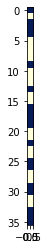

In [58]:
plt.imshow(tf.reshape(out,(36,1)),cmap='YlGnBu')

In [76]:
def start_client(path):
    global model
    global pymodel
    global client
    client = mph.start(version = '5.3a')
    pymodel = client.load(path)
    model = pymodel.java
    
def save_model():
    model.save(path)
    
def generate_image(grids_of_interest):
    adj = [x - 1 if x > 18 else x for x in grids_of_interest]
    out = np.flip(np.array([1 if x in adj else 0 for x in np.arange(17,53)]))
    return out
    
def simulate_random():
    global start_count
#     grids_of_interest = [random.randint(15,50) for i in range(0,random.randint(1,36))]
#     grids_of_interest = [random.randint(15,50) for i in range(0,18)]
    possible = list(np.append(np.array(17),np.arange(19,54)))
    grids_of_interest = random.sample(possible,18)
    not_of_interest = [x for x in possible if x not in grids_of_interest]
#     this_scattering = scattering + grids_of_interest
    
#     model.physics("emw").feature("sctr1").selection().set(this_scattering);
#     model.physics("emw").feature("ffd1").feature("ffc1").selection().set(grids_of_interest);

    model.physics("emw").feature("trans1").selection().set(not_of_interest)
    model.physics("emw").feature("trans5").selection().set(grids_of_interest)

    model.geom("geom1").runAll();
    model.mesh().run();
    model.sol("sol1").runAll();
    
    model.result("pg4").set("data", 'dset1')
    model.result("pg4").feature("ff1").run()
    model.result().export("plot1").set("filename", save_str + '.csv')
    model.result().export("plot1").set("plotgroup", "pg4")
    model.result().export("plot1").set("plot", "ff1")
    
    model.result().export("plot1").run()

    return grids_of_interest

def simulate(vals):
    global start_count
    grids_of_interest = vals
    this_scattering = scattering + grids_of_interest
#     print(this_scattering)
    
    model.physics("emw").feature("sctr1").selection().set(this_scattering);
    model.physics("emw").feature("ffd1").feature("ffc1").selection().set(grids_of_interest);

    model.geom("geom1").runAll();
    model.mesh().run();
    model.sol("sol1").runAll();
    
    model.result("pg4").set("data", 'dset1')
    model.result("pg4").feature("ff1").run()
    model.result().export("plot1").set("filename", save_str + '.csv')
    model.result().export("plot1").set("plotgroup", "pg4")
    model.result().export("plot1").set("plot", "ff1")
    
    model.result().export("plot1").run()

    return grids_of_interest

In [78]:
for instance in tqdm(np.arange(40)):
    img_list = []

    save_str = 'C:/Users/THzAbacus/Documents/Josh/LeakyWaveML/comsol_results/1dbinary_greyschema/' + str(int(time.time()))

    start_client(path)
    start_time = time.time()
    for i in tqdm(np.arange(500)):
        goi = simulate_random()
        array = generate_image(goi)
        img_list.append(array)

    print(time.time() - start_time, 'seconds')

    with open(save_str + '.pkl', 'wb') as file:
        pickle.dump(img_list, file)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

java.lang.RuntimeException: java.lang.RuntimeException: java.io.IOException: There is not enough space on the disk

In [74]:
model.save('D:/Josh/Fall 2021/ML-LWA/june8test2.mph')

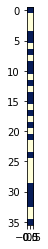

In [73]:
plt.imshow(tf.reshape(img_list[0],(36,1)),cmap='YlGnBu')

<h1>Please don't close out of this, very long simulation in progress! Using the computer is fine just don't close this window, thanks!</h1>

<h4>Light simulations should work fine but if you need to do anything heavy, click Kernel in the toolbar above and just hit shutdown, just shoot me (Josh) an email if you need to do that.</h4>

In [ ]:
for instance in tqdm(np.arange(40)):
    img_list = []

    save_str = 'C:/Users/THzAbacus/Documents/Josh/LeakyWaveML/comsol_results/1dconstantslots_pec/' + str(int(time.time()))

    start_client(path)
    start_time = time.time()
    for i in tqdm(np.arange(500)):
        goi = simulate_random()
        array = generate_image(goi)
        img_list.append(array)

    print(time.time() - start_time, 'seconds')

    with open(save_str + '.pkl', 'wb') as file:
        pickle.dump(img_list, file)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

16676.315572738647 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

16692.723877429962 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

16814.140983581543 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

16914.045490264893 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

16993.69294667244 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

In [10]:
model.save('D:/Josh/Fall 2021/ML-LWA/may24test.mph')

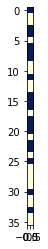

In [13]:
plt.imshow(tf.expand_dims(img_list[0],1),cmap='YlGnBu')

In [4]:
with open('1d/peaks_to_slot/constant_power/results/test_data510.pkl', 'rb') as pkl_file:
    slots, true, preds, _ = pickle.load(pkl_file)

In [ ]:
preds.shape

In [5]:
def top_16(slot):

    median = np.sort(slot)[18]
    out = [1 if x >= median else 0 for x in slot]
    return out

In [ ]:
plt.imshow(tf.expand_dims(top_16(preds[12]),1),cmap = 'YlGnBu')

In [ ]:
start_client(path)

In [6]:
img_list = []

save_str = 'C:/Users/THzAbacus/Documents/Josh/LeakyWaveML/comsol_results/validation510'

start_client(path)
start_time = time.time()
for i in tqdm(np.arange(500)):
    
    assump = list(np.where(np.flip(top_16(preds[i])))[0] + 15)

#     naive = list(np.where(np.flip(tf.round(prediction[i])))[0] + 15)
    
    goi = simulate(assump)
    array = generate_image(goi)
    img_list.append(array)
    
#     goi = simulate(naive)
#     array = generate_image(goi)
#     img_list.append(array)

print(time.time() - start_time, 'seconds')

with open(save_str + '.pkl', 'wb') as file:
    pickle.dump(img_list, file)

  0%|          | 0/500 [00:00<?, ?it/s]

18335.179027318954 seconds


In [ ]:
img_list[0]

In [ ]:
plt.imshow(tf.expand_dims(img_list[0],1))

In [ ]:
plt.imshow(tf.expand_dims(top_16(preds[0]),1))

In [ ]:
test = np.array([1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [ ]:
img_list = []

save_str = 'C:/Users/THzAbacus/Documents/Josh/LeakyWaveML/comsol_results/1d/' + str(int(time.time()))

start_client(path)
start_time = time.time()
    
assump = list(np.where(np.flip(test))[0] + 15)
    
goi = simulate(assump)
array = generate_image(goi)
img_list.append(array)



print(time.time() - start_time, 'seconds')

with open(save_str + '.pkl', 'wb') as file:
    pickle.dump(img_list, file)